In [1]:
# 1.数据读取，并查看样本所含的属性和具体的样本
import csv
with open('D:\\winedata\winemag-data-130k-v2.csv', 'r') as reader:
    lines = csv.reader(reader)
    header_row=next(lines)   #读取并分析CSV文件头
    print(header_row)
    
#     print(header_row[12])
    sample1=next(lines)   #输出若干个样本，确定每个属性的属性类别，用于制作数据摘要
    print(sample1)
    
    sample2=next(lines)
    print(sample2)


['', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
['0', 'Italy', "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.", 'Vulk脿 Bianco', '87', '', 'Sicily & Sardinia', 'Etna', '', 'Kerin O鈥橩eefe', '@kerinokeefe', 'Nicosia 2013 Vulk脿 Bianco  (Etna)', 'White Blend', 'Nicosia']
['1', 'Portugal', "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.", 'Avidagos', '87', '15.0', 'Douro', '', '', 'Roger Voss', '@vossroger', 'Quinta dos Avidagos 2011 Avidagos Red (Douro)', 'Portuguese Red', 'Quinta dos Avidagos']


In [18]:
# 2.为每个属性生成属性序列
import csv
country=[]
designation=[]
province=[]
region_1=[]
region_2=[]
variety=[]
winery=[]
points=[]
price_fouse=[]      #保存去除离群点后的价格序列
price_nozero=[]     #保存去除缺省值的价格序列
price=[]
gate=1
with open('D:\\winedata\winemag-data-130k-v2.csv',errors='ignore') as reader:  #数据样本中中会有无法解码的错误，所以需要errors='ignore'
    lines = csv.reader(reader)
    for line in lines:
        if gate==1:
            gate=0
        else:
            country.append(line[1])
            designation.append(line[3])
            points.append(float(line[4]))
            if line[5]=='':
                price.append(0)
            else:
#             price.append(line[5])
                price.append(float(line[5]))
            if line[5]!='':
                price_nozero.append(float(line[5]))
                if float(line[5])<200:
                    price_fouse.append(float(line[5]))
            province.append(line[6])
            region_1.append(line[7])           #得到包含单个属性所有取值的序列
            region_2.append(line[8])
            variety.append(line[12])
            winery.append(line[13])
            

In [3]:
from collections import Counter

counters = Counter(country)
print(counters)

Counter({'US': 54504, 'France': 22093, 'Italy': 19540, 'Spain': 6645, 'Portugal': 5691, 'Chile': 4472, 'Argentina': 3800, 'Austria': 3345, 'Australia': 2329, 'Germany': 2165, 'New Zealand': 1419, 'South Africa': 1401, 'Israel': 505, 'Greece': 466, 'Canada': 257, 'Hungary': 146, 'Bulgaria': 141, 'Romania': 120, 'Uruguay': 109, 'Turkey': 90, 'Slovenia': 87, 'Georgia': 86, 'England': 74, 'Croatia': 73, 'Mexico': 70, '': 63, 'Moldova': 59, 'Brazil': 52, 'Lebanon': 35, 'Morocco': 28, 'Peru': 16, 'Ukraine': 14, 'Czech Republic': 12, 'Serbia': 12, 'Macedonia': 12, 'Cyprus': 11, 'India': 9, 'Switzerland': 7, 'Luxembourg': 6, 'Armenia': 2, 'Bosnia and Herzegovina': 2, 'Slovakia': 1, 'China': 1, 'Egypt': 1})


In [4]:
# 查看统计数据
countersdesignation = Counter(designation)
print(countersdesignation)

Counter({'': 37465, 'Reserve': 2009, 'Estate': 1322, 'Reserva': 1259, 'Riserva': 698, 'Estate Grown': 621, 'Brut': 513, 'Dry': 413, 'Barrel sample': 375, 'Crianza': 343, 'Estate Bottled': 342, 'Vieilles Vignes': 308, 'Brut Ros茅': 276, 'Gran Reserva': 261, 'Barrel Sample': 252, 'Tradition': 238, 'Old Vine': 221, 'Extra Dry': 204, 'Ros茅 of': 172, 'Ros茅': 166, 'R茅serve': 153, 'Single Vineyard': 131, 'Vintage': 128, 'Estate Reserve': 125, 'Bien Nacido Vineyard': 120, 'Late Harvest': 112, 'Classic': 111, 'Unoaked': 110, 'Barrel Select': 106, 'Late Bottled Vintage': 99, 'Blanc de Blancs Brut': 96, 'Old Vines': 95, 'Estate Vineyard': 90, 'Stillwater Creek Vineyard': 90, 'Barrel Fermented': 90, 'Cuv茅e Prestige': 89, 'Grand Reserve': 85, 'Signature': 85, 'Blanc de Blancs': 83, 'Tinto': 80, 'Private Reserve': 78, 'Collection': 77, 'Semi-Dry': 76, 'Prestige': 75, "Vintner's Reserve": 72, 'Limited Release': 71, 'Roble': 68, 'Dutton Ranch': 67, 'Trocken': 66, "Rosella's Vineyard": 65, 'Stagecoach V

In [5]:
countersprovince = Counter(province)
print(countersprovince)

Counter({'California': 36247, 'Washington': 8639, 'Bordeaux': 5941, 'Tuscany': 5897, 'Oregon': 5373, 'Burgundy': 3980, 'Northern Spain': 3851, 'Piedmont': 3729, 'Mendoza Province': 3264, 'Veneto': 2716, 'New York': 2688, 'Alsace': 2440, 'Northeastern Italy': 2138, 'Loire Valley': 1856, 'Sicily & Sardinia': 1797, 'Champagne': 1613, 'Southwest France': 1503, 'Southern Italy': 1349, 'South Australia': 1349, 'Provence': 1346, 'Douro': 1281, 'Central Italy': 1233, 'Catalonia': 1164, 'Rh么ne Valley': 1081, 'Beaujolais': 1044, 'Mosel': 1039, 'Alentejano': 937, 'Colchagua Valley': 830, 'Marlborough': 798, 'Virginia': 777, 'Tejo': 683, 'France Other': 676, 'Burgenland': 672, 'Maipo Valley': 659, 'Languedoc-Roussillon': 613, 'Casablanca Valley': 601, 'Port': 601, 'Nieder枚sterreich': 600, 'Other': 536, 'Lombardy': 533, 'Lisboa': 506, 'Central Spain': 485, 'Maule Valley': 471, 'Levante': 454, 'Stellenbosch': 443, 'Galicia': 410, 'Vinho Verde': 410, 'Kamptal': 409, 'Central Valley': 356, 'Wachau': 3

In [6]:
countersregion_1 = Counter(region_1)
print(countersregion_1)

Counter({'': 21247, 'Napa Valley': 4480, 'Columbia Valley (WA)': 4124, 'Russian River Valley': 3091, 'California': 2629, 'Paso Robles': 2350, 'Willamette Valley': 2301, 'Mendoza': 2301, 'Alsace': 2163, 'Champagne': 1613, 'Barolo': 1599, 'Finger Lakes': 1565, 'Sonoma Coast': 1474, 'Brunello di Montalcino': 1470, 'Rioja': 1469, 'Sonoma County': 1246, 'Toscana': 1197, 'Walla Walla Valley (WA)': 1066, 'Chianti Classico': 1062, 'Santa Barbara County': 1000, 'Carneros': 999, 'Yakima Valley': 997, 'Sta. Rita Hills': 975, 'Dry Creek Valley': 939, 'Sicilia': 925, 'C么tes de Provence': 859, 'Santa Ynez Valley': 812, 'Santa Lucia Highlands': 806, 'Lodi': 803, 'Barbaresco': 794, 'Alexander Valley': 784, 'Central Coast': 749, 'Ribera del Duero': 724, 'Red Mountain': 723, 'Santa Maria Valley': 704, 'Alto Adige': 694, 'Sonoma Valley': 661, 'Anderson Valley': 646, 'North Fork of Long Island': 599, 'Saint-脡milion': 561, 'Chablis': 559, 'Horse Heaven Hills': 559, 'Virginia': 556, 'Dundee Hills': 554, 'Sa

In [7]:
countersregion_2 = Counter(region_2)
print(countersregion_2)

Counter({'': 79460, 'Central Coast': 11065, 'Sonoma': 9028, 'Columbia Valley': 8103, 'Napa': 6814, 'Willamette Valley': 3423, 'California Other': 2663, 'Finger Lakes': 1777, 'Sierra Foothills': 1462, 'Napa-Sonoma': 1169, 'Central Valley': 1062, 'Southern Oregon': 917, 'Oregon Other': 727, 'Long Island': 680, 'North Coast': 584, 'Washington Other': 534, 'South Coast': 272, 'New York Other': 231})


In [8]:
countersvariety = Counter(variety)
print(countersvariety)

Counter({'Pinot Noir': 13272, 'Chardonnay': 11753, 'Cabernet Sauvignon': 9472, 'Red Blend': 8946, 'Bordeaux-style Red Blend': 6915, 'Riesling': 5189, 'Sauvignon Blanc': 4967, 'Syrah': 4142, 'Ros茅': 3564, 'Merlot': 3102, 'Nebbiolo': 2804, 'Zinfandel': 2714, 'Sangiovese': 2707, 'Malbec': 2652, 'Portuguese Red': 2466, 'White Blend': 2360, 'Sparkling Blend': 2153, 'Tempranillo': 1810, 'Rh么ne-style Red Blend': 1471, 'Pinot Gris': 1455, 'Champagne Blend': 1396, 'Cabernet Franc': 1353, 'Gr眉ner Veltliner': 1345, 'Portuguese White': 1159, 'Bordeaux-style White Blend': 1066, 'Pinot Grigio': 1052, 'Gamay': 1025, 'Gew眉rztraminer': 1012, 'Viognier': 996, 'Shiraz': 836, 'Petite Sirah': 770, 'Sangiovese Grosso': 751, 'Barbera': 721, 'Glera': 709, 'Port': 668, 'Grenache': 651, 'Corvina, Rondinella, Molinara': 619, 'Chenin Blanc': 591, 'Tempranillo Blend': 588, 'Carmen猫re': 575, 'Albari帽o': 477, 'Pinot Blanc': 442, 'Rh么ne-style White Blend': 425, "Nero d'Avola": 365, 'Aglianico': 359, 'Moscato': 358, '

In [9]:
counterswinery = Counter(winery)
print(counterswinery)

Counter({'Wines & Winemakers': 222, 'Testarossa': 218, 'DFJ Vinhos': 215, 'Williams Selyem': 211, 'Louis Latour': 199, 'Georges Duboeuf': 196, 'Chateau Ste. Michelle': 194, 'Concha y Toro': 164, 'Columbia Crest': 159, 'Kendall-Jackson': 130, 'Siduri': 126, 'Gary Farrell': 125, 'Lynmar': 118, 'Montes': 117, 'Albert Bichot': 117, 'Undurraga': 113, 'Trapiche': 113, 'Casa Santos Lima': 113, 'Jean-Luc and Paul Aegerter': 113, 'Robert Mondavi': 112, 'Santa Ema': 112, 'Chanson P猫re et Fils': 109, 'Fess Parker': 108, 'V. Sattui': 107, 'Iron Horse': 106, 'Foxen': 105, 'Louis Jadot': 104, 'Chehalem': 102, 'Maryhill': 102, 'Feudi di San Gregorio': 102, 'Domaine Zind-Humbrecht': 101, 'Br眉ndlmayer': 101, 'Kunde': 101, 'Dutton-Goldfield': 100, "D'Arenberg": 100, 'Terre Rouge': 100, 'Errazuriz': 99, 'Kenwood': 98, 'Henri de Villamont': 98, 'Seven Hills': 98, 'J. Portugal Ramos': 98, 'Cameron Hughes': 98, 'Martin Ray': 98, 'Dr. Loosen': 96, 'Rodney Strong': 96, 'Georges Vigouroux': 96, 'Fenestra': 95,

In [10]:
counterspoints = Counter(points)
print(counterspoints)

Counter({88.0: 17207, 87.0: 16933, 90.0: 15410, 86.0: 12600, 89.0: 12226, 91.0: 11359, 92.0: 9613, 85.0: 9530, 93.0: 6489, 84.0: 6480, 94.0: 3758, 83.0: 3025, 82.0: 1836, 95.0: 1535, 81.0: 692, 96.0: 523, 80.0: 397, 97.0: 229, 98.0: 77, 99.0: 33, 100.0: 19})


In [15]:
countersprice = Counter(price)
print(countersprice)

Counter({'': 8996, '20.0': 6940, '15.0': 6066, '25.0': 5805, '30.0': 4951, '18.0': 4883, '12.0': 3934, '40.0': 3872, '35.0': 3801, '13.0': 3549, '16.0': 3547, '10.0': 3439, '22.0': 3357, '50.0': 3334, '14.0': 3215, '45.0': 3135, '17.0': 3053, '28.0': 2942, '24.0': 2826, '19.0': 2816, '60.0': 2277, '11.0': 2058, '55.0': 1981, '32.0': 1963, '38.0': 1728, '23.0': 1715, '26.0': 1706, '65.0': 1614, '75.0': 1403, '42.0': 1403, '36.0': 1392, '29.0': 1387, '9.0': 1339, '48.0': 1309, '21.0': 1232, '27.0': 1193, '70.0': 1100, '34.0': 1069, '39.0': 924, '8.0': 892, '80.0': 881, '33.0': 668, '90.0': 665, '85.0': 655, '44.0': 586, '100.0': 585, '49.0': 585, '37.0': 527, '52.0': 517, '7.0': 433, '46.0': 430, '58.0': 413, '95.0': 397, '54.0': 384, '125.0': 328, '43.0': 311, '56.0': 291, '31.0': 276, '59.0': 263, '120.0': 262, '62.0': 253, '150.0': 239, '47.0': 239, '68.0': 222, '110.0': 200, '69.0': 195, '41.0': 194, '53.0': 187, '64.0': 186, '72.0': 178, '57.0': 144, '130.0': 141, '105.0': 133, '79.

In [12]:
countersprice_nozero = Counter(price_nozero)
print(countersprice_nozero)

Counter({20.0: 6940, 15.0: 6066, 25.0: 5805, 30.0: 4951, 18.0: 4883, 12.0: 3934, 40.0: 3872, 35.0: 3801, 13.0: 3549, 16.0: 3547, 10.0: 3439, 22.0: 3357, 50.0: 3334, 14.0: 3215, 45.0: 3135, 17.0: 3053, 28.0: 2942, 24.0: 2826, 19.0: 2816, 60.0: 2277, 11.0: 2058, 55.0: 1981, 32.0: 1963, 38.0: 1728, 23.0: 1715, 26.0: 1706, 65.0: 1614, 75.0: 1403, 42.0: 1403, 36.0: 1392, 29.0: 1387, 9.0: 1339, 48.0: 1309, 21.0: 1232, 27.0: 1193, 70.0: 1100, 34.0: 1069, 39.0: 924, 8.0: 892, 80.0: 881, 33.0: 668, 90.0: 665, 85.0: 655, 44.0: 586, 100.0: 585, 49.0: 585, 37.0: 527, 52.0: 517, 7.0: 433, 46.0: 430, 58.0: 413, 95.0: 397, 54.0: 384, 125.0: 328, 43.0: 311, 56.0: 291, 31.0: 276, 59.0: 263, 120.0: 262, 62.0: 253, 150.0: 239, 47.0: 239, 68.0: 222, 110.0: 200, 69.0: 195, 41.0: 194, 53.0: 187, 64.0: 186, 72.0: 178, 57.0: 144, 130.0: 141, 105.0: 133, 79.0: 128, 78.0: 125, 6.0: 120, 66.0: 118, 115.0: 114, 140.0: 112, 135.0: 110, 63.0: 98, 200.0: 94, 67.0: 89, 99.0: 84, 175.0: 82, 51.0: 79, 82.0: 75, 89.0: 7

In [15]:
import numpy as np  #进行五数概况


 
 
def fiveNumber(nums):
    #五数概括 Minimum（最小值）、Q1、Median（中位数、）、Q3、Maximum（最大值）
    Minimum=min(nums)
    Maximum=max(nums)
    Q1=np.percentile(nums,25)
    Median=np.median(nums)
    Q3=np.percentile(nums,75)
    
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR #下限值
    upper_limit=Q3+1.5*IQR #上限值
    
    return Minimum,Q1,Median,Q3,Maximum,lower_limit,upper_limit
#
print(fiveNumber(points))
print(fiveNumber(price_nozero))



(80.0, 86.0, 88.0, 91.0, 100.0, 78.5, 98.5)
(4.0, 17.0, 25.0, 42.0, 3300.0, -20.5, 79.5)


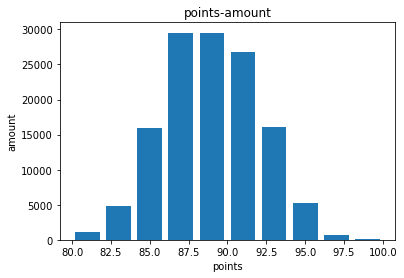

In [25]:
import matplotlib.pyplot as plt  #进行直方图绘制

Y = points
X = list(range(80,102,2))

plt.hist(Y, X, histtype='bar', rwidth=0.8)

plt.xlabel('points')
plt.ylabel('amount')

plt.title('points-amount')
plt.show()


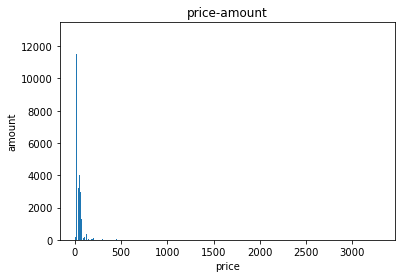

In [25]:
YY = price_nozero
XX = list(range(4,3300,3))


plt.hist(YY, XX, histtype='bar', rwidth=0.8)

plt.xlabel('price')
plt.ylabel('amount')

plt.title('price-amount')

plt.show()

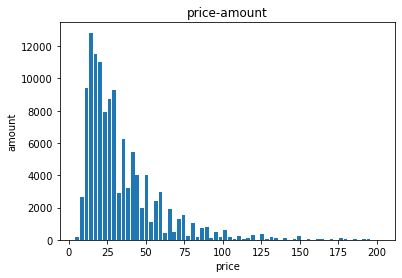

In [31]:
YYY = price_fouse
XXX = list(range(4,203,3))


plt.hist(YYY, XXX, histtype='bar', rwidth=0.8)

plt.xlabel('price')
plt.ylabel('amount')

plt.title('price-amount')

plt.show()

In [ ]:
# 数据缺失的处理
# 1.将缺失部分剔除
import csv
countryD=[]
designationD=[]
provinceD=[]
region_1D=[]
region_2D=[]
varietyD=[]
wineryD=[]
pointsD=[]
price_fouseD=[]      #保存去除离群点后的价格序列
price_nozeroD=[]     #保存去除缺省值的价格序列
priceD=[]
gate=1
with open('D:\\winedata\winemag-data-130k-v2.csv',errors='ignore') as reader:  #数据样本中中会有无法解码的错误，所以需要errors='ignore'
    lines = csv.reader(reader)
    for line in lines:
        if gate==1:
            gate=0
        else:
            if line[3]!='' and line[5]!='' and line[7]!='' and line[8]!='':
                countryD.append(line[1])
                designationD.append(line[3])
                pointsD.append(float(line[4]))
                if line[5]=='':
                    priceD.append(0)
                else:
#               priceD.append(line[5])
                priceD.append(float(line[5]))
                if line[5]!='':
                    price_nozeroD.append(float(line[5]))
                    if float(line[5])<200:
                        price_fouseD.append(float(line[5]))
                provinceD.append(line[6])
                region_1D.append(line[7])           #得到包含单个属性所有取值的序列
                region_2D.append(line[8])
                varietyD.append(line[12])
                wineryD.append(line[13])                              

In [21]:
#2.用最高频率值来填补缺失值
#根据统计数据，得到最高频率值，一旦出现缺省值，便用其进行填充
import csv
country=[]
designation=[]
province=[]
region_1=[]
region_2=[]
variety=[]
winery=[]
points=[]
price_fouse=[]      #保存去除离群点后的价格序列
price_nozero=[]     #保存去除缺省值的价格序列
price=[]
gate=1
with open('D:\\winedata\winemag-data-130k-v2.csv',errors='ignore') as reader:  #数据样本中中会有无法解码的错误，所以需要errors='ignore'
    lines = csv.reader(reader)
    for line in lines:
        if gate==1:
            gate=0
        else:
            country.append(line[1])
            if line[3]=='':
                designation.append("Reserve")
            else:
                designation.append(line[3])
            points.append(float(line[4]))
            if line[5]=='':
                price.append(20.0)
            else:
#             price.append(line[5])
                price.append(float(line[5]))
            if line[5]!='':
                price_nozero.append(float(line[5]))
                if float(line[5])<200:
                    price_fouse.append(float(line[5]))
            province.append(line[6])
            if line[7]=='':
                price.append("Napa Valley")
            else:            
                region_1.append(line[7])           #得到包含单个属性所有取值的序列
            if line[8]=='':
                price.append("Central Coast")
            else:            
                region_2.append(line[8])
            variety.append(line[12])
            winery.append(line[13])
            

In [22]:
countersdesignation = Counter(designation)
print(countersdesignation)

Counter({'Reserve': 39474, 'Estate': 1322, 'Reserva': 1259, 'Riserva': 698, 'Estate Grown': 621, 'Brut': 513, 'Dry': 413, 'Barrel sample': 375, 'Crianza': 343, 'Estate Bottled': 342, 'Vieilles Vignes': 308, 'Brut Ros茅': 276, 'Gran Reserva': 261, 'Barrel Sample': 252, 'Tradition': 238, 'Old Vine': 221, 'Extra Dry': 204, 'Ros茅 of': 172, 'Ros茅': 166, 'R茅serve': 153, 'Single Vineyard': 131, 'Vintage': 128, 'Estate Reserve': 125, 'Bien Nacido Vineyard': 120, 'Late Harvest': 112, 'Classic': 111, 'Unoaked': 110, 'Barrel Select': 106, 'Late Bottled Vintage': 99, 'Blanc de Blancs Brut': 96, 'Old Vines': 95, 'Estate Vineyard': 90, 'Stillwater Creek Vineyard': 90, 'Barrel Fermented': 90, 'Cuv茅e Prestige': 89, 'Grand Reserve': 85, 'Signature': 85, 'Blanc de Blancs': 83, 'Tinto': 80, 'Private Reserve': 78, 'Collection': 77, 'Semi-Dry': 76, 'Prestige': 75, "Vintner's Reserve": 72, 'Limited Release': 71, 'Roble': 68, 'Dutton Ranch': 67, 'Trocken': 66, "Rosella's Vineyard": 65, 'Stagecoach Vineyard': 

In [23]:
# 2.为每个属性生成属性序列
import csv
country=[]
designation=[]
province=[]
region_1=[]
region_2=[]
variety=[]
winery=[]
points=[]
price_fouse=[]      #保存去除离群点后的价格序列
price_nozero=[]     #保存去除缺省值的价格序列
price=[]
gate=1
with open('D:\\winedata\winemag-data-130k-v2.csv',errors='ignore') as reader:  #数据样本中中会有无法解码的错误，所以需要errors='ignore'
    lines = csv.reader(reader)
    for line in lines:
        if gate==1:
            gate=0
        else:
            country.append(line[1])
            designation.append(line[3])
            points.append(float(line[4]))
            if line[5]=='':
                price.append(25)
            else:
#             price.append(line[5])
                price.append(float(line[5]))
            if line[5]!='':
                price_nozero.append(float(line[5]))
                if float(line[5])<200:
                    price_fouse.append(float(line[5]))
            province.append(line[6])
            region_1.append(line[7])           #得到包含单个属性所有取值的序列
            region_2.append(line[8])
            variety.append(line[12])
            winery.append(line[13])
            

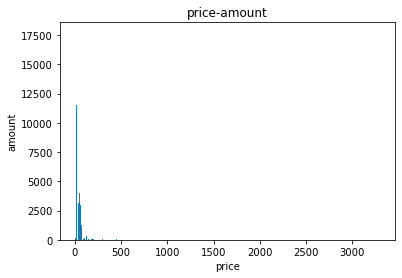

In [26]:
YY = price
XX = list(range(4,3300,3))


plt.hist(YY, XX, histtype='bar', rwidth=0.8)

plt.xlabel('price')
plt.ylabel('amount')

plt.title('price-amount')

plt.show()

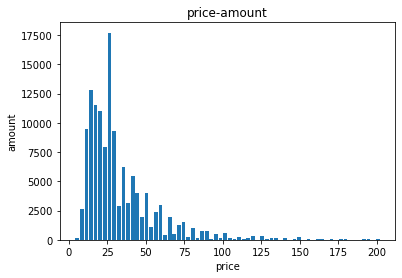

In [28]:
YY = price
XX = list(range(4,203,3))


plt.hist(YY, XX, histtype='bar', rwidth=0.8)

plt.xlabel('price')
plt.ylabel('amount')

plt.title('price-amount')

plt.show()